Testing association between age at vaccination and vaccine response

In [1]:
import os
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.dpi'] = 150

from scipy import stats
import numpy as np

In [2]:
data_path = '../data/'
metadata_path = '../data/metadata/'
plot_path = '../figures/'

### Data set up

In [3]:
# participants information
participants = pd.read_csv(os.path.join(metadata_path, 'participants.tsv'), sep='\t', index_col=0)
participants['Date of Birth'] = pd.to_datetime(participants['Date of Birth'])
participants.head()

,Subject ID,Date of Birth,Gender,Birth Height (cm),Birth Height Percentile,Birth Weight (kg),Birth Weight Percentile,Birth Head Cir. (cm),Birth Head Cir. Percentile,Race #1,...,Amphibian/Reptile,Bird,Other,Live on Farm?,Smokers at home?,Any medical conditions/signs/symptoms prior to study?,Condition #1,Past or Current?,Condition #2,Past or Current?.1
PrimaryKey,,,,,,,,,,,,,,,,,,,,,
Baby101,101,2018-01-24,Male,Not Documented,Not Documented,3.646,Not Documented,Not Documented,Not Documented,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,Nevus,Current,NaN,NaN
Baby102,102,2018-02-20,Male,50,50,3.35,37,34.5,25,Arab/North African,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby103,103,2018-02-21,Female,52,84,3.41,51,36.5,85,White/Caucasian,...,NaN,NaN,NaN,No,No,Yes,broken collar bone,Current,NaN,NaN
Baby104,104,2018-03-12,Female,55.2,98,3.615,61,35.6,64,White/Caucasian,...,NaN,NaN,NaN,No,No,No,NaN,NaN,NaN,NaN
Baby105,105,2018-03-30,Female,50.8,72.31,3.97,89.09,34,32.73,White/Caucasian,...,NaN,NaN,pigs,No,No,Yes,Jaundice,Current,NaN,NaN


In [4]:
# titres information -- use this to get date that 1y response is measured
titres = pd.read_csv(os.path.join(data_path, 'vaccine_response', 'titers.tsv'), sep='\t', index_col=0)
titres['Date'] = pd.to_datetime(titres['Date'])
titres.head()

,BabyN,Date,VisitCode,VisitType,Age(Days),Category,CollectionMethod,SampleType,Antigen,Value,Unit,ProtectiveThreshold
PrimaryKey,,,,,,,,,,,,
Baby106_2m_PT,Baby106,2018-05-29,V5,Well Check 02m,63,2m,Heelstick,Serum,PT,5.00,ELU/ml,8.0
Baby110_2m_PT,Baby110,2018-07-09,V5,Well Check 02m,63,2m,Heelstick,Serum,PT,60.00,ELU/ml,8.0
Baby113_2m_PT,Baby113,2018-07-26,V5,Well Check 02m,72,2m,Heelstick,Serum,PT,22.00,ELU/ml,8.0
Baby113_2m_Dip,Baby113,2018-07-26,V5,Well Check 02m,72,2m,Heelstick,Serum,Dip,0.58,IU/ml,0.1
Baby115_2m_PT,Baby115,2018-08-24,V6,Well Check 04m,92,2m,Heelstick,Serum,PT,5.00,ELU/ml,8.0


In [5]:
# vaccine response information
y1_vax_response = pd.read_csv(os.path.join(data_path, 'vaccine_response', 'vaccine_response_y1.tsv'), sep='\t')
display(y1_vax_response.head())
print(y1_vax_response.shape)

,BabyN,PT,Dip,FHA,PRN,TET,PRP (Hib),PCV ST1,PCV ST3,PCV ST4,...,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV,PT_protected,Dip_protected,FHA_protected,PRN_protected,TET_protected,PRP (Hib)_protected,VR_group
0,Baby106,2.5,0.21,11.0,2.5,0.30,0.39,141.0,35.0,56.0,...,0.061955,0.052874,0.061955,False,True,True,False,True,True,NVR
1,Baby107,2.5,0.44,3.0,9.0,0.52,1.60,2430.0,415.0,194.0,...,0.449483,0.114018,0.958142,False,True,False,True,True,True,NVR
2,Baby108,2.5,0.05,1.5,2.5,0.05,0.27,21.0,3.0,24.0,...,0.000000,0.000000,0.003102,False,False,False,False,False,True,LVR
3,Baby109,27.0,NaN,NaN,63.0,1.35,7.02,NaN,NaN,NaN,...,0.700925,0.763049,0.486810,True,False,False,True,True,True,NVR
4,Baby110,14.0,0.24,15.0,20.0,2.45,NaN,301.0,63.0,400.0,...,0.266219,0.284211,0.245121,True,True,True,True,True,False,NVR


(72, 49)


In [6]:
# vaccine dose information
vax_dates = pd.read_csv(os.path.join(metadata_path, 'vaccines.tsv'), sep='\t')
vax_dates.head()

# # turns out the additional information we got via email from eduardo isn't in vaccines.tsv -- this is my mistake
# vax_dates = pd.read_csv('../../data/metadata/original_data_sheets/vaxdates_annotated.csv')
# display(vax_dates.head())

,PrimaryKey,BabyN,Date of Birth,Visit Date,Age (Days),Vaccine
0,101_DTaP_1,101,1/24/18,3/26/18,61,DTaP
1,102_DTaP_1,102,2/20/18,4/20/18,59,DTaP
2,102_DTaP_2,102,2/20/18,6/20/18,120,DTaP
3,103_DTaP_1,103,2/21/18,4/27/18,65,DTaP
4,103_DTaP_2,103,2/21/18,8/24/18,184,DTaP


In [6]:
# # there are some issues with this table: try fixing them by hand

# # infant 215 is in this table twice, with 2 DOBs but same vax dates -- remove the incorrect one
# # display(vax_dates[vax_dates.BabyN==215])
# # display(participants.loc['Baby215'])
# dob_215 = pd.to_datetime(participants.loc['Baby215']['Date of Birth']).date()
# # print(dob_215)
# # print(vax_dates.shape)
# vax_dates = vax_dates[~((vax_dates.BabyN==215)&(vax_dates['Date of Birth']!='03/29/2018'))] # what a fucking bodge
# # display(vax_dates[vax_dates.BabyN==215])

# # infant 118 doesn't have any vaccinations - should be removed from (all?) analysis
# vax_dates = vax_dates[~(vax_dates.BabyN==118)]

In [7]:
# Arrange data for plotting

# filter on kids with y1 vaccine response information
vax_dates = vax_dates.loc[('Baby'+vax_dates.BabyN.astype(str)).isin(y1_vax_response.BabyN)]
# add dose and ag_dose
vax_dates['dose'] = [row.PrimaryKey.split('_')[2] for irow, row in vax_dates.iterrows()]
vax_dates['ag_dose'] = [row.Vaccine+'_'+row.PrimaryKey.split('_')[2] for irow, row in vax_dates.iterrows()]
# restrict to first three doses
vax_dates = vax_dates[vax_dates.dose.astype(int) <=3]
# make long
vax_dates_wide = vax_dates.pivot(index='BabyN', columns='ag_dose', values='Age (Days)')
# take min for dose 1, 2, 3
vax_dates_wide['Dose1'] = vax_dates_wide[['DTaP_1','HiB_1','Prevnar 13_1']].min(axis=1)
vax_dates_wide['Dose2'] = vax_dates_wide[['DTaP_2','HiB_2','Prevnar 13_2']].min(axis=1)
vax_dates_wide['Dose3'] = vax_dates_wide[['DTaP_3','HiB_3','Prevnar 13_3']].min(axis=1)
# add when titers were measured
titer_age = pd.DataFrame(titres[titres.Category=='1y'][['BabyN','Age(Days)']].groupby('BabyN')['Age(Days)'].agg('median')).reset_index()
titer_age.rename(columns={'Age(Days)':'TiterY1'}, inplace=True)
titer_age['BabyN'] = titer_age.BabyN.str.lstrip('Baby').astype(int)
vax_dates_wide = vax_dates_wide.merge(titer_age, on='BabyN')
# add vaccine response information
vax_resp = y1_vax_response[['BabyN','VR_group','median_mmNorm','median_mmNorm_DTAPHib','median_mmNorm_PCV']]
vax_resp['BabyN'] = vax_resp.BabyN.str.lstrip('Baby').astype(int)
vax_dates_wide = vax_dates_wide.merge(vax_resp, on='BabyN')

/var/folders/pt/1n34csq15fs5kqwjkx79wsym0000gn/T/ipykernel_6401/779033365.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vax_resp['BabyN'] = vax_resp.BabyN.str.lstrip('Baby').astype(int)


In [ ]:
vax_dates_wide.head()

,BabyN,DTaP_1,DTaP_2,DTaP_3,HiB_1,HiB_2,HiB_3,Prevnar 13_1,Prevnar 13_2,Prevnar 13_3,Dose1,Dose2,Dose3,TiterY1,VR_group,median_mmNorm,median_mmNorm_DTAPHib,median_mmNorm_PCV
0,106,63,126,217,63,126,217,63,126,217,63,126,217,371.0,NVR,0.061955,0.052874,0.061955
1,107,63,137,200,63,137,200,63,137,200,63,137,200,378.0,NVR,0.449483,0.114018,0.958142
2,108,62,127,190,62,127,190,62,127,190,62,127,190,370.0,LVR,0.000000,0.000000,0.003102
3,109,62,126,191,62,126,191,62,126,191,62,126,191,440.0,NVR,0.700925,0.763049,0.486810
4,110,63,126,189,63,126,189,63,126,189,63,126,189,375.0,NVR,0.266219,0.284211,0.245121


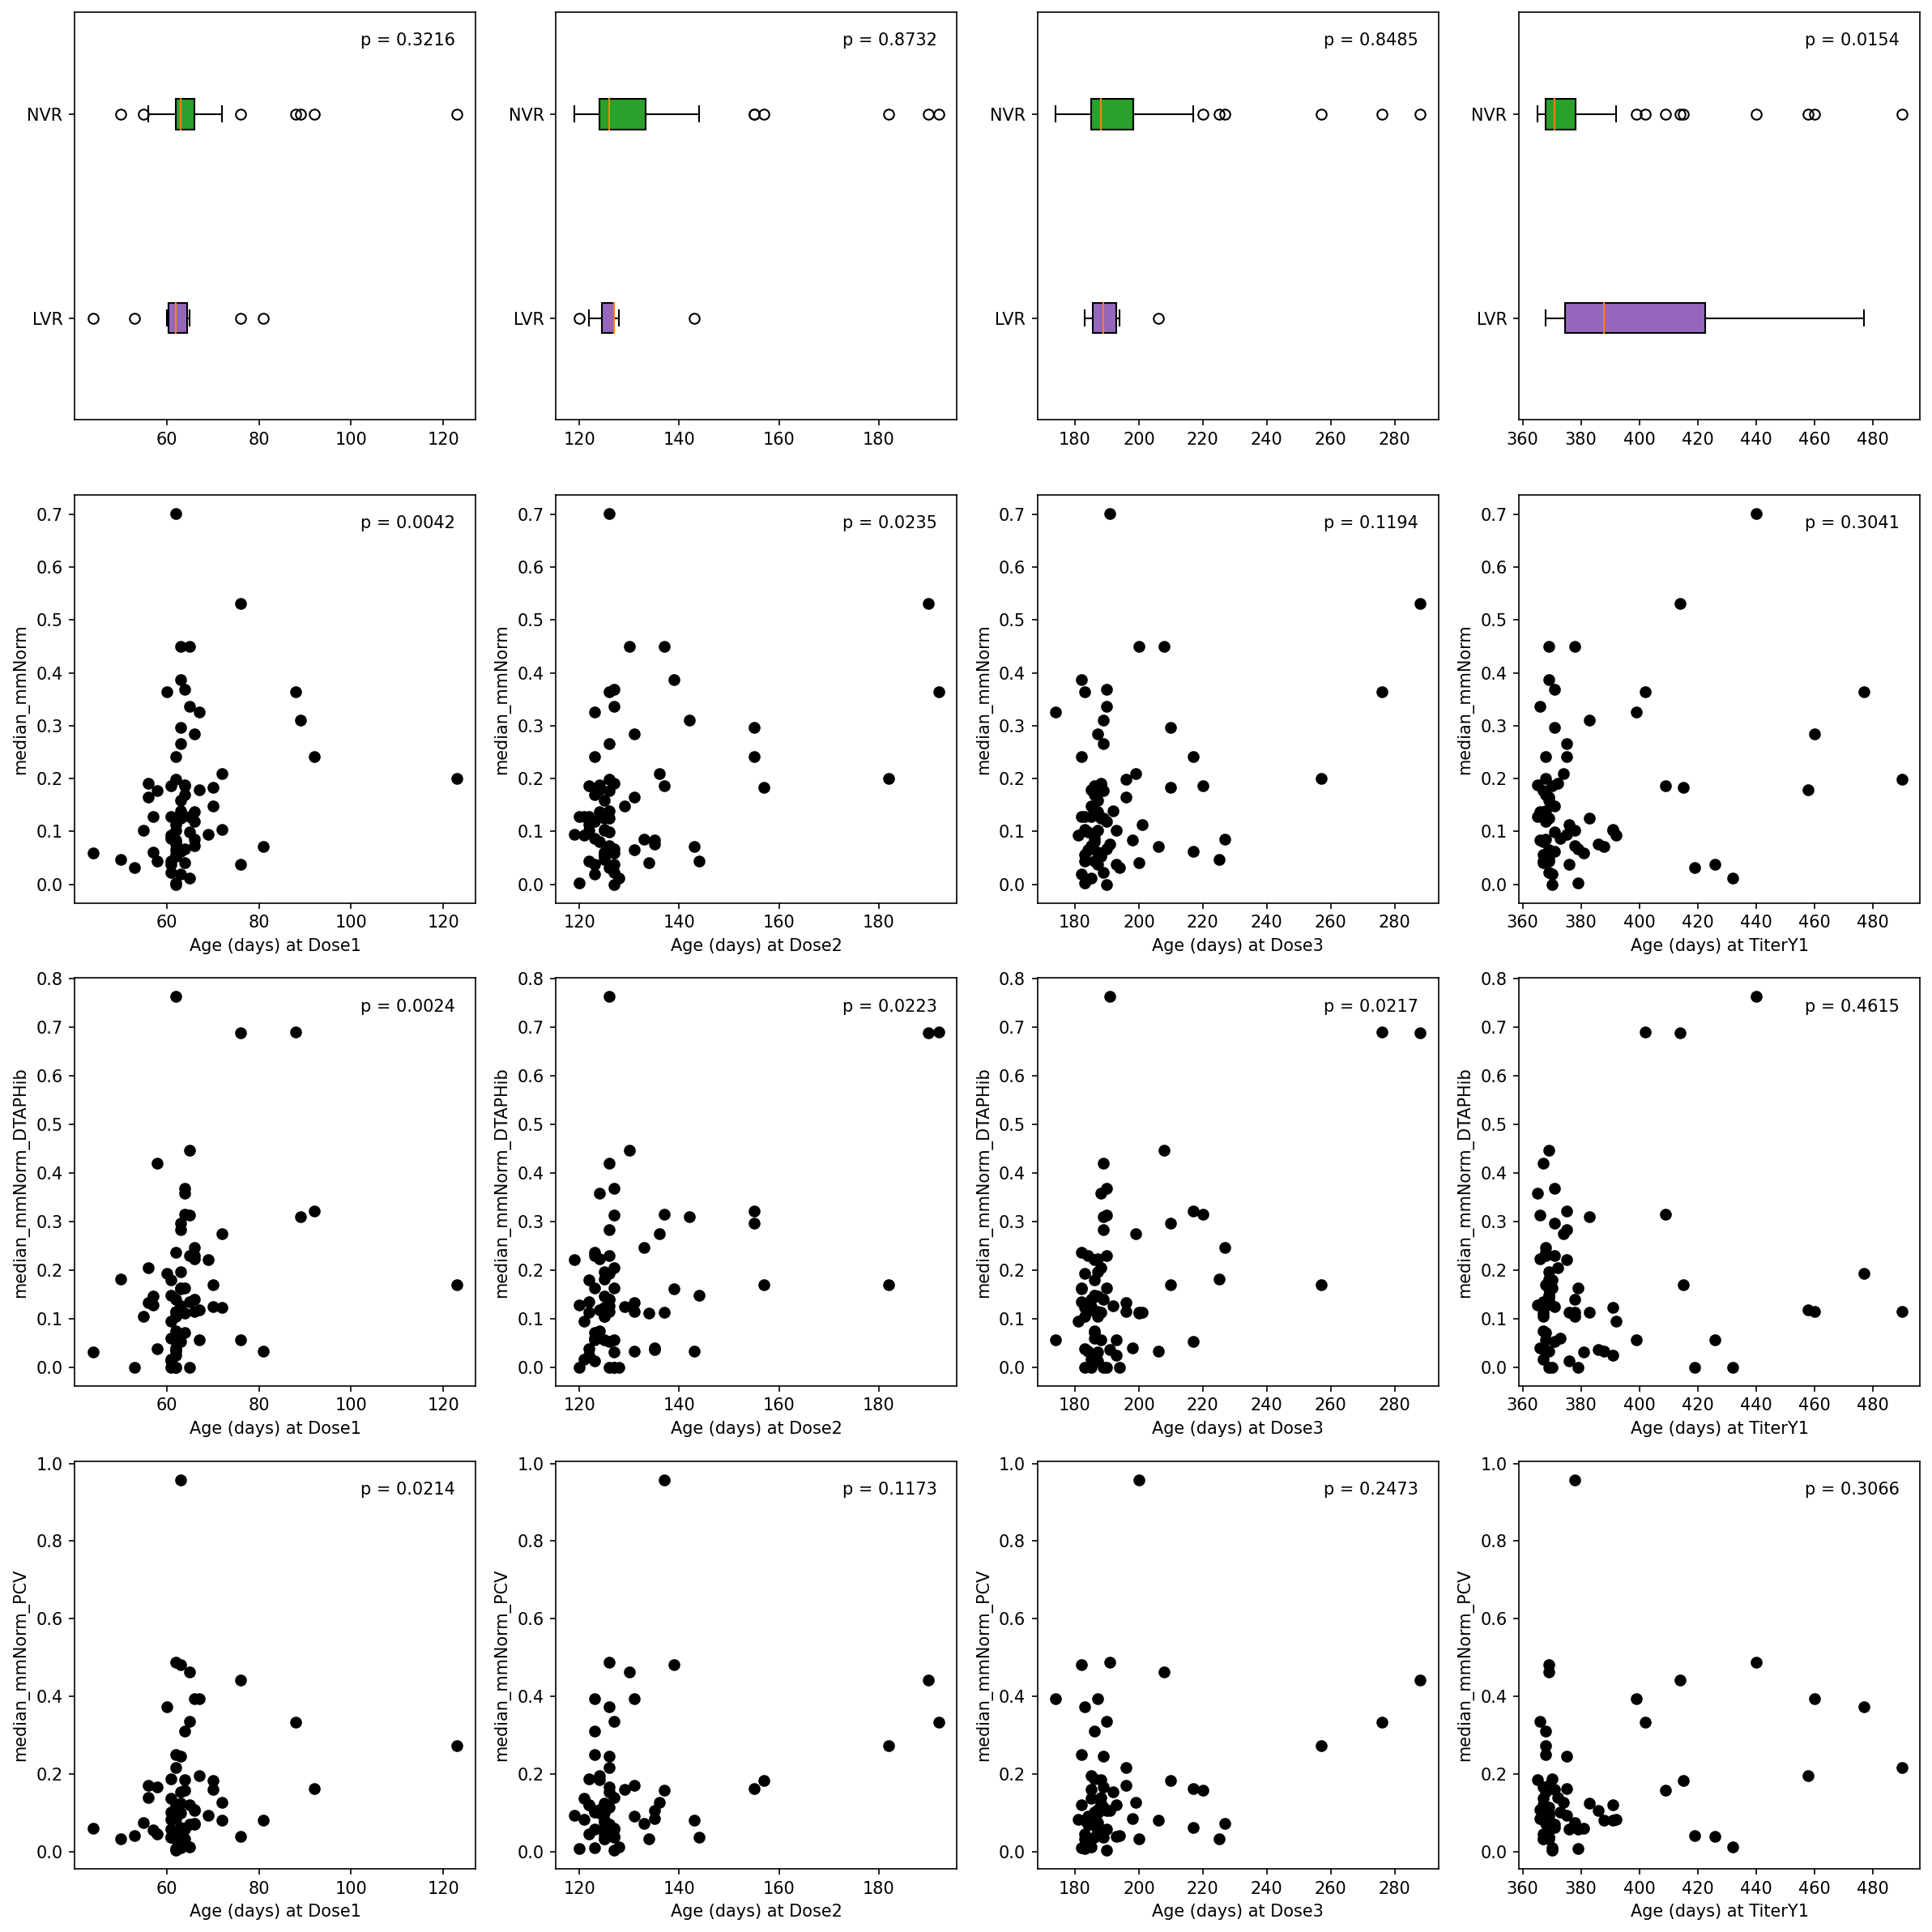

In [14]:
# plot and stats

fig = plt.figure(figsize=(4*4,4*4))
axs = [fig.add_subplot(4,4,i+1) for i in range(4*4)]
for di, dose in enumerate(['Dose1','Dose2','Dose3','TiterY1']):
    for oi, outcome in enumerate(['VR_group','median_mmNorm','median_mmNorm_DTAPHib','median_mmNorm_PCV']):
        ax = axs[(oi*4)+di]
        # ax.text(0.5,0.5,dose+'\n'+outcome)
        if outcome == 'VR_group':
            # categorical analysis -- boxplots
            lvr_dat = vax_dates_wide[vax_dates_wide[outcome]=='LVR'][dose]
            nvr_dat = vax_dates_wide[vax_dates_wide[outcome]=='NVR'][dose]
            # stats
            mwu = stats.mannwhitneyu(lvr_dat, nvr_dat)
            # plot -- this is _nasty_ looking, work on that
            bp = ax.boxplot([lvr_dat,nvr_dat], vert=False,
                       patch_artist=True,
                       labels=['LVR','NVR'])
            VRcolours = ['tab:purple','tab:green']
            for p,c in zip(bp['boxes'], VRcolours):
                p.set_facecolor(c)
            ax.text(0.95, 0.95, 
                    'p = '+str(round(mwu.pvalue,4)), # TODO: make this p value formatting better
                    ha='right', va='top',
                    transform=ax.transAxes)
            
        else:
            # continous analysis -- scatter plots
            xtp = vax_dates_wide[vax_dates_wide[outcome].notnull()][dose]
            ytp = vax_dates_wide[vax_dates_wide[outcome].notnull()][outcome]
            spearman = stats.spearmanr(xtp, ytp)
            ax.scatter(xtp, ytp, color='k')
            ax.text(0.95, 0.95, 
                    'p = '+str(round(spearman[1],4)), # TODO: make this p value formatting better
                    ha='right', va='top',
                    transform=ax.transAxes)
            ax.set_xlabel('Age (days) at '+dose)
            ax.set_ylabel(outcome)
plt.tight_layout()
plt.savefig(os.path.join(plot_path, 'SuppFig_AgeAtVax.pdf'), dpi=600)    